# Lab Activity 5.6. Fit and Apply Neural Network Model

In this exercise we fit and apply a neural network model on a synthetic and real dataset and evaluate the results.

**Learning Outcomes**
1. Fit and apply a Neural Network on a synthetic and real data.
2. Fit and apply a linear regression model using *Stochastic* Gradient descent.
3. Compare between the capabilities of the linear and non-linear models.
4. Examine the effect of number of hidden units on the predictive capabilities of the neural network.
5. Ability to interpret the results of the prediction.


In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from mpl_toolkits import mplot3d
import time

# Generate the Data

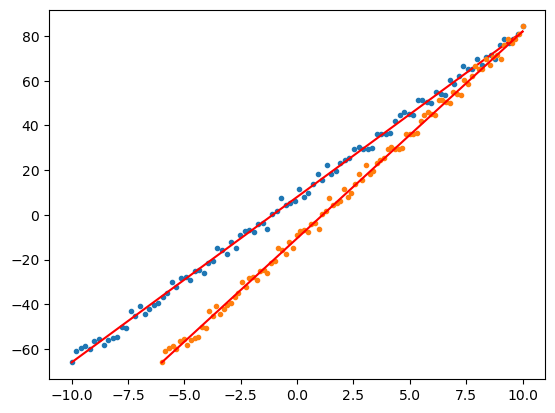

In [2]:
def realFunc(x1,x2):
    return 2 + 5*x1 + 3*x2
    #return 2 + 5*x1**2
def generate_data(N=100):
    N = N
    noise = 2 #40
    x1 = np.linspace(-10.0,10.0,N) 
    x2 = np.linspace(-6.0,10.0,N) 
    t1 = np.random.normal(realFunc(x1,x2),noise) # target

    #plot the data along the real model
    plt.plot(x1,t1,'.')
    plt.plot(x1,realFunc(x1,x2),'r')

    plt.plot(x2,t1,'.')
    plt.plot(x2,realFunc(x1,x2),'r')
    # generate model solution

    X = np.c_[x1,x2]
    return X, t1


X, t = generate_data()

In [3]:
X.shape

(100, 2)

In [4]:
def outSGD(J, w, tme, name='SGD',ax=None, plotJ=True, printw=True):        
    if plotJ:
        ax = ax or plt.gca()
        ax.plot(J[1:],'.b')
    if printw:
        print("y ={}+ {}x1".format(w[0],w[1]), " {} took:    {} seconds ".format(name, tme))


In [5]:
def SGD(w,X,t):                                      # vectorised
    N    = len(t)                                    # number of data points
    grad = -(1.0/(  N))*X.T*(t - X*w)                # gradient
    J    =  (1.0/(2*N))*    (t - X*w).T * (t - X*w)  # the loss
    return grad, J

In [6]:
def SGD_miniBatch_Learn(X1,t, eta=0.01, maxep=100, decay=0.9): #,  **kwargs): # vectorised
    start_time = time.time()
    # data perperation......................................
    N = X1.shape[0]
    M = X1.shape[1]
    b = 20                                # mini-batch size
    
    x0= np.ones(N)              
    X = np.c_[x0, X1]                      # add dummy feature
    
    X = np.matrix(X)
    t = np.matrix(t).T

    w_all = []        
    w = np.ones((M+1,1))                  # initialise w
    J = np.zeros((maxep))                 # the loss in each epoch
    
    for ep in range(maxep):               # epochs
        for tau in range(int(N/b)):       # batches
            X_= X[tau*b:(tau+1)*b,:]
            t_= t[tau*b:(tau+1)*b]
            grad, J_ = SGD(w,X_,t_)
            w   -= eta*grad
            J[ep]+=J_
        eta *= decay
            #w_all.append(w)

    tme = time.time() - start_time
    return w, J, tme, w_all 


def predict(X, w):
    N =X.shape[0]
    X = np.c_[np.ones(N), X]
    return X.dot(w).reshape(N)

averaged model error = 3.2561530897543696
y =[0.90570656]+ [4.52726392]x1  SGD_vectrzd took:    0.0117645263671875 seconds 
[[0.90570656]
 [4.52726392]
 [3.63322426]]


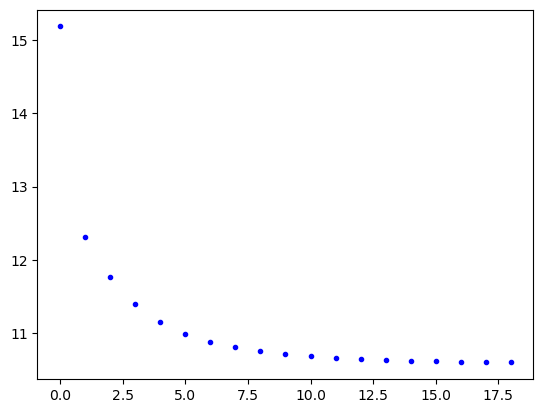

In [7]:
w, J, tme,_ = SGD_miniBatch_Learn(X, t, eta=0.01, maxep=20, decay=0.95) #, eta, maxep, decay,ax2)

print('averaged model error =', np.sqrt(J[-1]))      # note that this will be close to the noise that we add when we generated the data

outSGD(J, w, tme, 'SGD_vectrzd')
print(w)

# Multi-Layers Neural Network with Sigmoid and Linear Activation Functions Respectively

## Fit and Apply a Neural Network on Our Previous Synthetic Data

Let us try a neural network now on our data

In [8]:
from sklearn.neural_network import MLPRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from time import time

In [9]:
# X, t = generate_data() # uncoment if you want to regenrate a new fresh data

In [10]:
regr  = MLPRegressor(random_state=1, hidden_layer_sizes=(5,3), max_iter=10000).fit(X, t)
y_nn  = regr.predict(X)
R2    = regr.score(X, t)
y_SGD = predict(X, w)


Now we compare between the capabilities of the two models. We need to calculate the R2.
We can calculate the SSD and SST easily:

1. SSD is the sum of squared prediction errors
2. SST is the sum of squared error from the mean of the target
3. R2 = 1- SSD/SST

It shows how good our prediction is in comparison with predicting via the mean of the targets

In [11]:
SSE1 = ((t - y_SGD)**2).sum()
SSE2 = ((t - y_nn )**2).sum()
SST  = ((t - t.mean())**2).sum()
R2_SGD = 1- SSE1/SST
R2_NN  = 1- SSE2/SST


print(R2_SGD)
print(R2_NN)
print(R2)  # R2 is identical with R2_NN

0.9977493550361525
0.9977565614565498
0.9977565614565498


This shows that our prediction and the Neural Networks prediction are both very good for this simple data. Our SGD is faster because it has less built-in optimisations. Of course SGD is less capable when the data is non-linear.

In [12]:
SST = ((t -      t.mean())**2).sum()
SSE = ((t - predict(X, w))**2).sum()
print(SSE)
print(SST)
print(1- SSE/SST)

423.55826098179733
188194.17002036332
0.9977493550361525


Let us now generate new data via sklearn and apply a neural network regressor on the data

In [13]:
X, y = make_regression(n_samples=100, random_state=1)
X_train, X_test, y_train, y_test = train_test_split(X, y,  random_state=1)

regr = MLPRegressor(random_state=1,hidden_layer_sizes=(5,4),max_iter=10000).fit(X_train, y_train)
regr.predict(X_test[:2])
regr.score(X_test, y_test)

-0.27025966896459486

Let us examine the coefficients

In [14]:
regr.coefs_[1:]

[array([[ 1.71509841e-216,  1.50055803e+000, -9.40878048e-001,
          1.30699351e+000],
        [-1.14341012e-168, -4.09133040e-001,  1.77402019e+000,
          9.76278847e-001],
        [-4.69906536e-166,  1.29236375e+000, -1.26966315e+000,
          1.06428740e+000],
        [ 6.05517197e-155,  1.22768913e+000,  1.35355091e+000,
          1.66881026e+000],
        [ 5.83890954e-214,  1.99459187e+000,  3.39801125e-001,
          1.40959444e+000]]),
 array([[ 1.08036086e-192],
        [ 2.19621545e+000],
        [-6.86402391e+000],
        [ 2.25955633e+000]])]

## Fit and Apply Neural Network Model on Housing Data

Ok now we are ready to apply a neural network to regress the houses prices in California :)

In [15]:
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split

### Load the data

In [16]:
cal_housing = fetch_california_housing()
X = pd.DataFrame(cal_housing.data, columns=cal_housing.feature_names)
y = cal_housing.target
X.shape, y.shape

((20640, 8), (20640,))

### Prepare the data

In [17]:

y -= y.mean()
#print (y.sum()/len(y))
X = (X-X.min())/(X.max()-X.min())    # rescale
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.1, random_state=0)


### Fit the model
Now we are ready to train the neural network

In [18]:
print("Training MLPRegressor...")
tic = time()
regre = MLPRegressor(hidden_layer_sizes=(50, 50), learning_rate_init=0.01, early_stopping=True)
regre.fit(X_train, y_train)


Training MLPRegressor...


MLPRegressor(early_stopping=True, hidden_layer_sizes=(50, 50),
             learning_rate_init=0.01)

We will output the R squared value to show to what extent the model was more successful than just predicting by taking the mean of the data.

In [19]:
print(f"done in {time() - tic:.3f}s")
print(f"Test R2 score: {regre.score(X_test, y_test):.2f}")

done in 276.128s
Test R2 score: 0.77


As we can see the R2 is high enough to have confidence in the prediction.

## Your turn

1. Lookup a regression dataset from [kaggle](https://www.kaggle.com/datasets?search=Regression) or [UCI](https://archive.ics.uci.edu/ml/datasets.php?format=&task=reg&att=&area=&numAtt=&numIns=&type=&sort=nameUp&view=table)
2. Try to perform a comparison between a linear regression model and a neural network model on the dataset
3. Try different basis and 
4. Employ a pipeline to add regularisation to your model


# Sample Solution
**Note.** It may take a longer time for the code to be executed, be patient!

In [20]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neural_network import MLPRegressor
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from scipy.spatial.distance import cdist

# Load the uploaded datasets
red_wine_path = 'winequality-red.csv'
white_wine_path = 'winequality-white.csv'

# Load datasets
red_wine = pd.read_csv(red_wine_path, sep=";")
white_wine = pd.read_csv(white_wine_path, sep=";")

# Combine red and white datasets for analysis
red_wine["type"] = "red"
white_wine["type"] = "white"
wine_data = pd.concat([red_wine, white_wine], axis=0)

# Features and target
X = wine_data.drop(columns=["quality", "type"])  # Features
y = wine_data["quality"]  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define a function to evaluate models
def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
    rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
    r2_train = r2_score(y_train, y_pred_train)
    r2_test = r2_score(y_test, y_pred_test)
    return rmse_train, rmse_test, r2_train, r2_test

# Linear Regression with Polynomial Basis Functions and Regularization
print("Linear Regression with Polynomial Basis Functions:")
degrees = [1, 2, 3]
for degree in degrees:
    pipeline = Pipeline([
        ('poly_features', PolynomialFeatures(degree=degree)),
        ('scaler', StandardScaler()),
        ('ridge_regression', Ridge())
    ])
    param_grid = {'ridge_regression__alpha': [0.1, 1.0, 10.0]}
    grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error')
    grid_search.fit(X_train, y_train)
    best_model = grid_search.best_estimator_
    rmse_train, rmse_test, r2_train, r2_test = evaluate_model(best_model, X_train, X_test, y_train, y_test)
    print(f'Polynomial Degree: {degree}')
    print(f'Best Alpha: {grid_search.best_params_["ridge_regression__alpha"]}')
    print(f'Linear Regression - RMSE Train: {rmse_train:.4f}, RMSE Test: {rmse_test:.4f}')
    print(f'Linear Regression - R2 Train: {r2_train:.4f}, R2 Test: {r2_test:.4f}\n')

# Neural Network Model with Hyperparameter Tuning and Regularization
print("Neural Network Model:")
param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50)],
    'activation': ['relu', 'tanh'],
    'alpha': [0.0001, 0.001, 0.01]
}
mlp = MLPRegressor(max_iter=1000, random_state=42)
grid_search = GridSearchCV(mlp, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)
best_mlp = grid_search.best_estimator_
rmse_train, rmse_test, r2_train, r2_test = evaluate_model(best_mlp, X_train_scaled, X_test_scaled, y_train, y_test)
print(f'Best Neural Network Parameters: {grid_search.best_params_}')
print(f'Neural Network - RMSE Train: {rmse_train:.4f}, RMSE Test: {rmse_test:.4f}')
print(f'Neural Network - R2 Train: {r2_train:.4f}, R2 Test: {r2_test:.4f}\n')

# Radial Basis Function (RBF) Transformation
class RBFSampler(BaseEstimator, TransformerMixin):
    def __init__(self, gamma=1.0, n_components=100):
        self.gamma = gamma
        self.n_components = n_components

    def fit(self, X, y=None):
        # Randomly select centers from the training data
        indices = np.random.choice(X.shape[0], self.n_components, replace=False)
        self.centers_ = X[indices]
        return self

    def transform(self, X):
        # Compute the RBF transformation
        return np.exp(-self.gamma * cdist(X, self.centers_) ** 2)

print("Linear Regression with Radial Basis Functions:")
gamma_values = [0.01, 0.1, 1.0]
for gamma in gamma_values:
    rbf_sampler = RBFSampler(gamma=gamma, n_components=100)
    X_train_rbf = rbf_sampler.fit_transform(X_train_scaled)
    X_test_rbf = rbf_sampler.transform(X_test_scaled)
    
    pipeline = Pipeline([
        ('ridge_regression', Ridge())
    ])
    param_grid = {'ridge_regression__alpha': [0.1, 1.0, 10.0]}
    grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error')
    grid_search.fit(X_train_rbf, y_train)
    best_model = grid_search.best_estimator_
    rmse_train, rmse_test, r2_train, r2_test = evaluate_model(best_model, X_train_rbf, X_test_rbf, y_train, y_test)
    print(f'RBF Gamma: {gamma}')
    print(f'Best Alpha: {grid_search.best_params_["ridge_regression__alpha"]}')
    print(f'Linear Regression with RBF - RMSE Train: {rmse_train:.4f}, RMSE Test: {rmse_test:.4f}')
    print(f'Linear Regression with RBF - R2 Train: {r2_train:.4f}, R2 Test: {r2_test:.4f}\n')

Linear Regression with Polynomial Basis Functions:
Polynomial Degree: 1
Best Alpha: 10.0
Linear Regression - RMSE Train: 0.7338, RMSE Test: 0.7392
Linear Regression - R2 Train: 0.2992, R2 Test: 0.2601

Polynomial Degree: 2
Best Alpha: 10.0
Linear Regression - RMSE Train: 0.7081, RMSE Test: 0.7552
Linear Regression - R2 Train: 0.3474, R2 Test: 0.2277

Polynomial Degree: 3
Best Alpha: 10.0
Linear Regression - RMSE Train: 0.6827, RMSE Test: 0.8307
Linear Regression - R2 Train: 0.3935, R2 Test: 0.0656

Neural Network Model:
Best Neural Network Parameters: {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (100,)}
Neural Network - RMSE Train: 0.6094, RMSE Test: 0.6731
Neural Network - R2 Train: 0.5167, R2 Test: 0.3865

Linear Regression with Radial Basis Functions:
RBF Gamma: 0.01
Best Alpha: 0.1
Linear Regression with RBF - RMSE Train: 0.7167, RMSE Test: 0.7096
Linear Regression with RBF - R2 Train: 0.3314, R2 Test: 0.3181

RBF Gamma: 0.1
Best Alpha: 0.1
Linear Regression with R